# Aula 01 - QuarentenaDados da Alura

Mini curso feito com o pessoal da Caelum e Alura para aprendizado inicial de data science.

## Importação do pandas

O pandas é uma biblioteca feita em Python muito utilizada para análise de dados.

In [0]:
import pandas as pd

## Ler dataset do MovieLens

Está sendo utilizado um dataset inicial com alguns filmes (resumidos) cadastrados na plataforma do MovieLens, onde os usuários podem avaliar filmes em geral.

Método utilizado para ler um CSV a partir de uma URI: `read_csv`.

Uma funcionalidade interessante do Jupyter Notebook é utilizar a interrogação `?` para ver uma parte da documentação e obter mais informações a respeito de determinada variável.

In [0]:
movies = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
?movies # Ver parte da documentação

movies.columns = ['movie_id', 'title', 'genres']

In [61]:
movies.head() # exibir os 5 primeiros arquivos

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
movies.head(10) #exibindo os 10 primeiros arquivos

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [63]:
movies.tail()

,movie_id,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [64]:
ratings = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
ratings.shape

(100836, 4)

In [65]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [66]:
ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [67]:
toy_story_ratings = ratings.query("movie_id == 1") # exemplo de query com pandas para buscar avaliações do filme "Toy Story"
toy_story_ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [68]:
ratings.describe() # visão geral de todas as avaliações

,user_id,movie_id,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [69]:
toy_story_ratings.describe() # visão geral do filme "Toy Story"

,user_id,movie_id,rating,timestamp
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [70]:
toy_story_ratings_mean = toy_story_ratings["rating"].mean() # média das notas do filme "Toy Story"
toy_story_ratings_mean

3.9209302325581397

In [71]:
all_movies_mean = ratings["rating"].mean() # média geral de todas as notas de todos os filmes
all_movies_mean

3.501556983616962

In [72]:
ratings_group_by_movies = ratings.groupby("movie_id")["rating"].mean()
ratings_group_by_movies.head()

movie_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

In [75]:
movies_with_rates = movies.join(ratings_group_by_movies, on="movie_id") # junção das duas "tabelas" (dataset com uma série)
movies_with_rates.columns = ['movie_id', 'title', 'genres', 'rating_mean']
movies_with_rates.head()

,movie_id,title,genres,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [78]:
sorted_movies_with_rates = movies_with_rates.sort_values('rating_mean', ascending=False) # ordenação de uma tabela
sorted_movies_with_rates.head()

,movie_id,title,genres,rating_mean
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


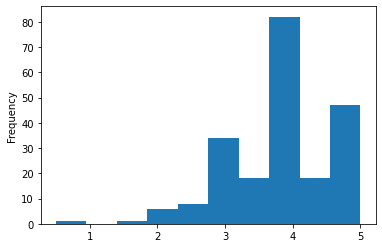

In [80]:
plot_toy_story_ratings = ratings.query("movie_id == 1")["rating"].plot(kind='hist')
plot_toy_story_ratings

## Desafio 1

Encontrar todos os filmes que não tiveram nota

## Desafio 2

Colocar o TOTAL de avaliações que o filme teve